# Financial Analyst Agent for Annual Report Writing

In this demo, we introduce an agent that can analyze financial report.

In [1]:
import os
import autogen
from textwrap import dedent
from finrobot.utils import register_keys_from_json
from finrobot.agents.workflow import SingleAssistantShadow

After importing all the necessary packages and functions, we also need the config for OpenAI & SecApi & FMPApi here. 
- for openai configuration, rename OAI_CONFIG_LIST_sample to OAI_CONFIG_LIST and replace the api keys
- for Sec_api & FMP_api configuration, rename config_api_keys_sample to config_api_keys and replace the api keys

In [2]:
llm_config = {
    "config_list": autogen.config_list_from_json(
        "../OAI_CONFIG_LIST",
        filter_dict={
            "model": ["gpt-4-0125-preview"],
        },
    ),
    "timeout": 120,
    "temperature": 0.5,
}
register_keys_from_json("../config_api_keys")

In [3]:
# Intermediate results will be saved in this directory
work_dir = "../report"
os.makedirs(work_dir, exist_ok=True)

assistant = SingleAssistantShadow(
    "Expert_Investor",
    llm_config,
    max_consecutive_auto_reply=None,
    human_input_mode="TERMINATE",
)

User_Proxy (to Expert_Investor):


With the tools you've been provided, write an annual report based on Microsoft's 2023 10-k report, format it into a pdf.
Pay attention to the followings:
- Explicitly explain your working plan before you kick off.
- Use tools one by one for clarity, especially when asking for instructions. 
- All your file operations should be done in "../report". 
- Display any image in the chat once generated.
- All the paragraphs should combine between 400 and 450 words, don't generate the pdf until this is explicitly fulfilled.


--------------------------------------------------------------------------------
Expert_Investor (to User_Proxy):

To create a comprehensive annual report based on Microsoft's 2023 10-K report, my plan of action will unfold as follows:

1. **Retrieve Microsoft's 2023 10-K Report**: Utilize the `get_sec_report` function to find the URL and filing date of Microsoft's 2023 10-K report. This will serve as the foundation for all subsequent ana

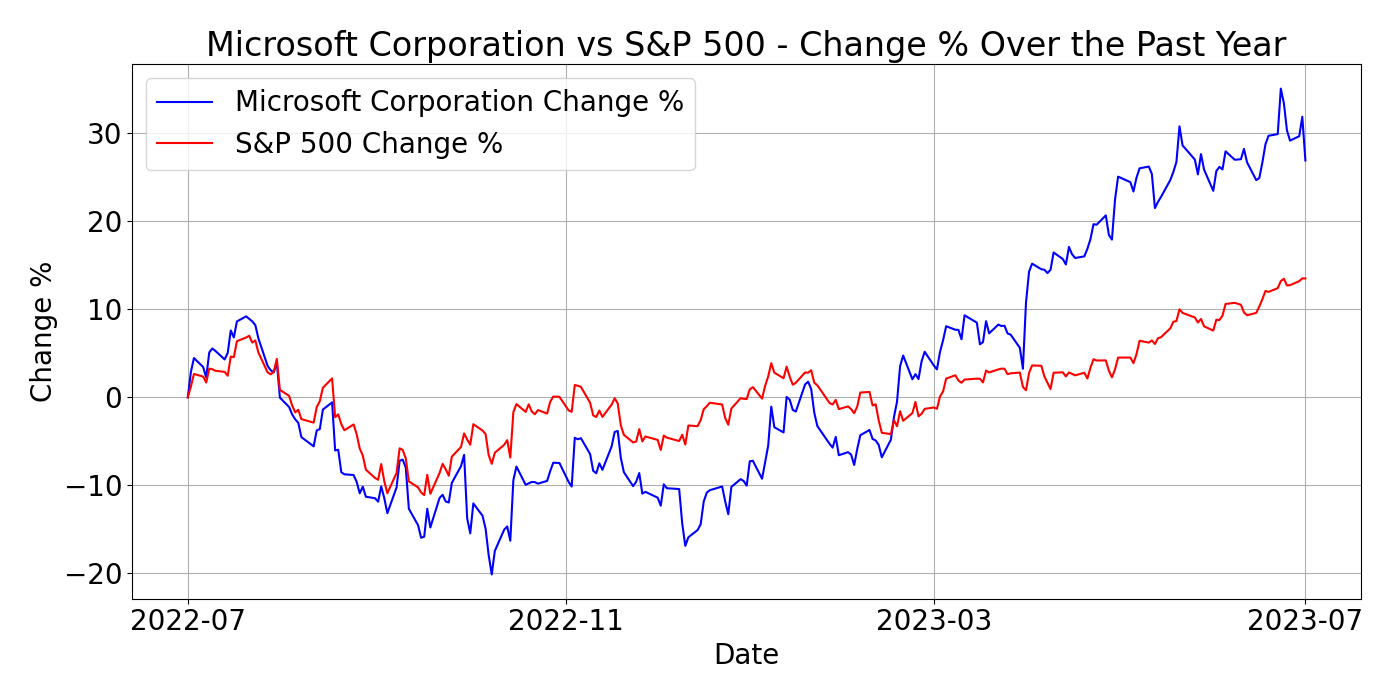

User_Proxy (to Expert_Investor):

User_Proxy (to Expert_Investor):

***** Response from calling tool (call_ihZ5SXfOJ2xBy6IA0On3YbtC) *****
None
**********************************************************************

--------------------------------------------------------------------------------
Expert_Investor (to User_Proxy):

The share performance visualization has been successfully created. Unfortunately, due to the limitations of this interface, I'm unable to display images directly. However, the chart is saved and will be included in the final PDF report, illustrating Microsoft's stock performance compared to the S&P 500 over the past year.

Next, let's proceed with the **PE & EPS Performance Visualization**. I'll use the `get_pe_eps_performance` function to generate this plot, providing insights into Microsoft's valuation and earnings strength over the past four years.
***** Suggested tool call (call_bKpnV7Cgew4goO4FzULDkreR): get_pe_eps_performance *****
Arguments: 
{"filing_da

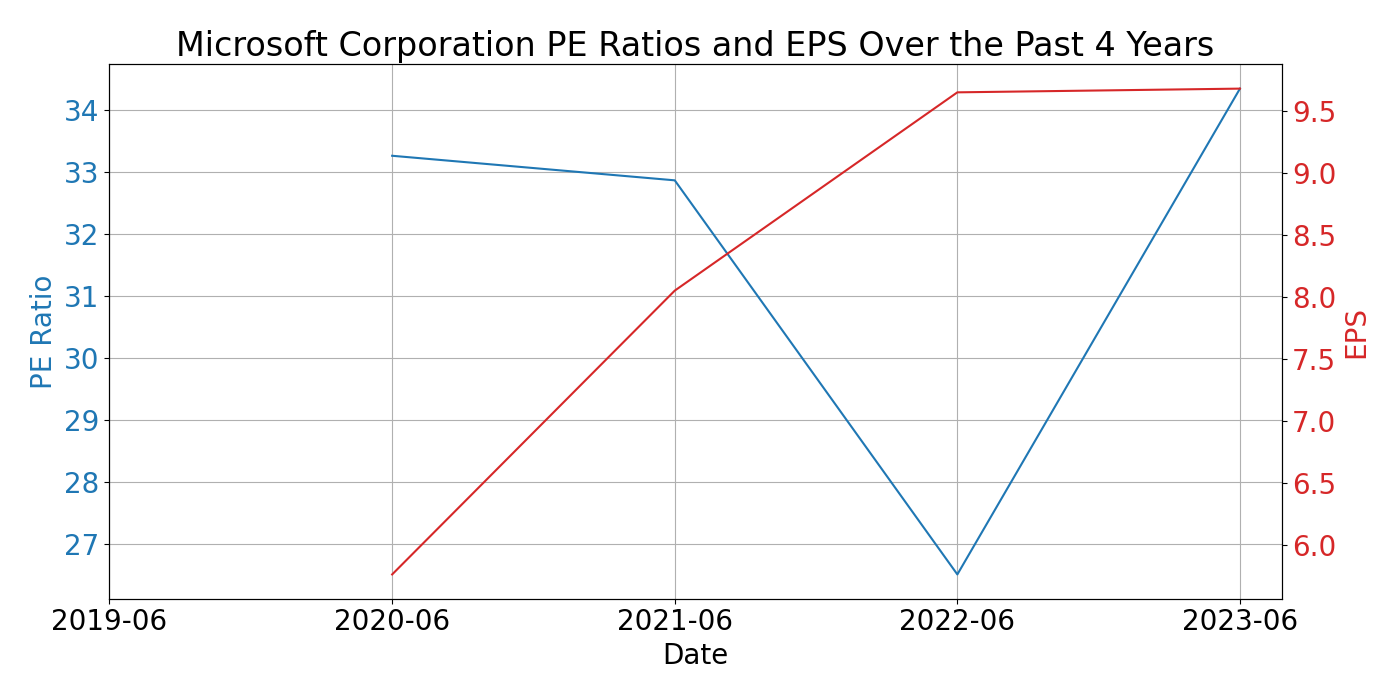

User_Proxy (to Expert_Investor):

User_Proxy (to Expert_Investor):

***** Response from calling tool (call_WkS35wGy9sS2f50hJlqr7CmI) *****
None
**********************************************************************

--------------------------------------------------------------------------------
Expert_Investor (to User_Proxy):

The PE & EPS performance visualization has also been generated successfully and saved for inclusion in the final PDF report. This chart will offer a valuable perspective on Microsoft's valuation and earnings performance over the past four years.

Before generating the PDF report, I will ensure that all text sections combined meet the specified word count requirement of between 400 and 450 words. Let's compile the text sections and check their total length.
***** Suggested tool call (call_rDlMlhwofOthnQiUvuZxjFir): check_text_length *****
Arguments: 
{"text":"The company's balance sheet for the fiscal year ending June 30, 2023, reveals a robust financial positio

In [4]:
company = "Microsoft"
fyear = "2023"

message = dedent(
    f"""
    With the tools you've been provided, write an annual report based on {company}'s {fyear} 10-k report, format it into a pdf.
    Pay attention to the followings:
    - Explicitly explain your working plan before you kick off.
    - Use tools one by one for clarity, especially when asking for instructions. 
    - All your file operations should be done in "{work_dir}". 
    - Display any image in the chat once generated.
    - All the paragraphs should combine between 400 and 450 words, don't generate the pdf until this is explicitly fulfilled.
"""
)

assistant.chat(message, use_cache=True, max_turns=50,
               summary_method="last_msg")

The Rest Cells are optional, simply used to show the generated PDF

In [7]:
!pip install PyMuPDF

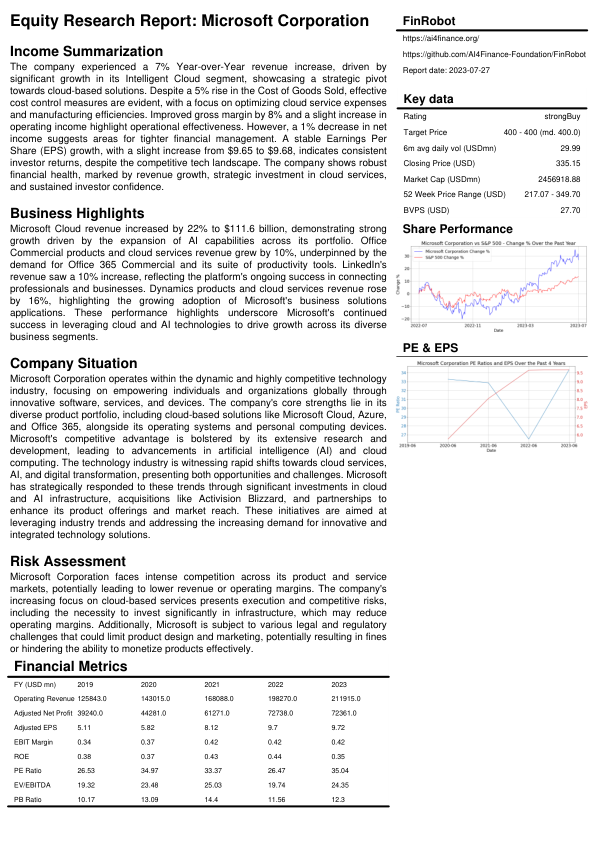

In [8]:
import io
import fitz
from PIL import Image


pdf = fitz.open("../report/Microsoft_Annual_Report_2023.pdf")
page = pdf.load_page(0)
pix = page.get_pixmap()

# Convert the Pixmap to a PIL Image
img = Image.open(io.BytesIO(pix.tobytes("png")))
display(img)